# Decision Tree
This is a Python notebook for Decision Tree Study. The main purpose is to practice how to use Python library to build up a decision tree classifier and make predicitons based on our own data.

## Background
Decision trees are a powerful prediction method and extremely popular. They are popular because the final model is so easy to understand by practitioners and domain experts alike. The final decision tree can explain exactly why a specific prediction was made, making it very attractive for operational use.

## Goal
After completing this course, you will know:

- How to prepare and load data
- How to run basic data processing for categorical data
- How to build up a decision tree classifier
- How to visualize a decision tree
- How to make prediction

Labs:
1. Classify Fruit
2. Classify Fruit with more features
3. Classify Iris
4. Intrusion Detection (Simple)
5. Intrusion Detection (Advanced)

Tianyu
Spring, 2021

v 1.0

---


## Lab 1: Classify Fruits

### Prepare Data

Load `sklearn` and other useful Python library

In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import OrdinalEncoder
from sklearn import tree

import matplotlib.pyplot as plt

In [ ]:
# an array (list of list) hold raw data
training_data = [
    ['Green', 3, 'Apple'],
    ['Yellow', 3, 'Apple'],
    ['Red', 1, 'Grape'],
    ['Red', 1, 'Grape'],
    ['Yellow', 3, 'Lemon'],
]

training_data

[['Green', 3, 'Apple'],
 ['Yellow', 3, 'Apple'],
 ['Red', 1, 'Grape'],
 ['Red', 1, 'Grape'],
 ['Yellow', 3, 'Lemon']]

### Load Data
We will use `pandas` API to preprocess our data. So, let's convert the **array** to `pandas` `Dataframe`.


In [ ]:
# assign column name
data_column_name = ['color', 'diameter', 'label']

# create a pandas DataFrame
data = pd.DataFrame(training_data, columns = data_column_name)
target_name = list(set(data.label))

# preview data frame
data.head()

,color,diameter,label
0,Green,3,Apple
1,Yellow,3,Apple
2,Red,1,Grape
3,Red,1,Grape
4,Yellow,3,Lemon


### Pre-processing

Machine learning models require all input and output variables to be numeric.

This means that if our data contains categorical data, we must encode it into numbers before we can fit and evaluate a model.

One of the most popular techniques is an Ordinal Encoding.

**Ordinal Encoding**

In ordinal encoding, each **unique category value** is assigned an **integer value**.
For example, `“red” is 1, “green” is 2, and “blue” is 3`.

This is called an ordinal encoding or an integer encoding and is easily reversible. Often, integer values starting at zero are used.

We will use `sklearn.preprocessing` library to convert our categorical data.

In [ ]:
label_enc = OrdinalEncoder()
feature_enc = OrdinalEncoder()

label_enc.fit(data[['label']])
feature_enc.fit(data[['color']])

data.label = label_enc.transform(data[['label']])
data.color = feature_enc.transform(data[['color']])


label_enc.categories_, feature_enc.categories_

([array(['Apple', 'Grape', 'Lemon'], dtype=object)],
 [array(['Green', 'Red', 'Yellow'], dtype=object)])

In [ ]:
data.head()

,color,diameter,label
0,0.0,3,0.0
1,2.0,3,0.0
2,1.0,1,1.0
3,1.0,1,1.0
4,2.0,3,2.0


Now our data has converted into a numerical form.

Next, we need to select our data feature and label for our machine learning classifier

In [ ]:
feature_name = ['color', 'diameter']

training_feature = data[feature_name]
training_label = data[['label']]

In [ ]:
training_feature

,color,diameter
0,0.0,3
1,2.0,3
2,1.0,1
3,1.0,1
4,2.0,3


In [ ]:
training_label

,label
0,0.0
1,0.0
2,1.0
3,1.0
4,2.0


### Build up Trees

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(training_feature, training_label)

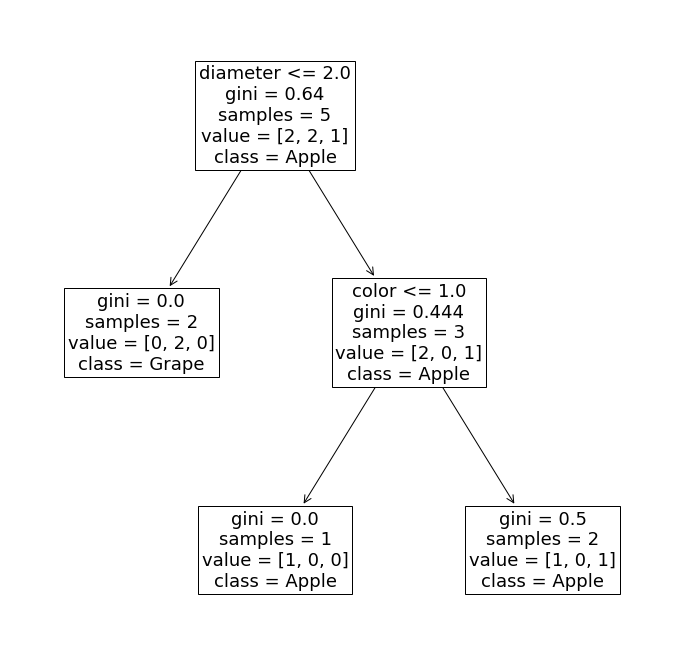

In [ ]:
plt.figure(figsize=(12,12)) 
tree.plot_tree(clf, feature_names=feature_name, class_names=target_name,  impurity=True,
                          fontsize = 18, filled=False) 
plt.show()

### Make Prediction

In [ ]:
test_data = [
    ['Green', 3],
    ['Yellow', 3],
    ['Red', 1],
]

test = pd.DataFrame(test_data, columns = ['color', 'diameter'])
test

,color,diameter
0,Green,3
1,Yellow,3
2,Red,1


In [ ]:
# encode categorical data
test.color = feature_enc.transform(test[['color']])
test

,color,diameter
0,0.0,3
1,2.0,3
2,1.0,1


In [ ]:
# make prediction using decision tree classifier
result_pred = clf.predict(test)
result_pred

array([0., 0., 1.])

In [ ]:
# convert encoded result back to textual format
for item in result_pred:
    print(label_enc.inverse_transform([[item]]))

[['Apple']]
[['Apple']]
[['Grape']]


---
## Lab 2: Classify Fruits with more features

Enrich Data with new features

In [ ]:
data_new = [
    ['Sour', 'Green', 3, 'Apple'],
    ['Sweet', 'Yellow', 3, 'Apple'],
    [ 'Sweet', 'Red', 1, 'Grape'],
    [ 'Sweet', 'Red', 1, 'Grape'],
    ['Sour', 'Yellow', 3, 'Lemon'],
    ['Sweet', 'Red', 3, 'Apple']
]

df = pd.DataFrame(data_new, columns = ['taste', 'color', 'diameter', 'label'])

df.head()

,taste,color,diameter,label
0,Sour,Green,3,Apple
1,Sweet,Yellow,3,Apple
2,Sweet,Red,1,Grape
3,Sweet,Red,1,Grape
4,Sour,Yellow,3,Lemon


In [ ]:
# pre-processing

feature_enc = OrdinalEncoder()
label_enc = OrdinalEncoder()

feature_enc.fit(df[['taste','color']])
label_enc.fit(df[['label']])


df[['taste','color']] = feature_enc.transform(df[['taste','color']])
df[['label']] = label_enc.transform(df[['label']])


df.head()

,taste,color,diameter,label
0,0.0,0.0,3,0.0
1,1.0,2.0,3,0.0
2,1.0,1.0,1,1.0
3,1.0,1.0,1,1.0
4,0.0,2.0,3,2.0


In [ ]:
# feature selction
feature_name = ['taste', 'color', 'diameter']

training_feature = df[feature_name]
training_label = df[['label']]

# build decision tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(training_feature, training_label)

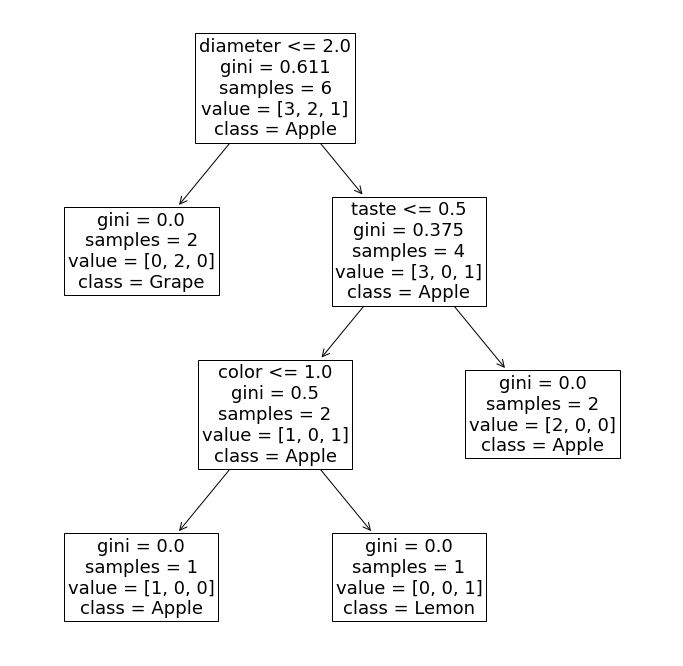

In [ ]:
# draw best decision tree
plt.figure(figsize=(12,12)) 
tree.plot_tree(clf, feature_names=feature_name, class_names=target_name,  impurity=True,
                          fontsize = 18, filled=False) 
plt.show()

In [ ]:
# test with new unlabel data
test_raw = [
    ['Sweet', 'Red', 3],
    ['Sour', 'Green', 3],
    ['Sour', 'Yellow', 3],
    ['Sweet', 'Yellow', 3],
    [ 'Sweet', 'Red', 1],
]

test = pd.DataFrame(test_raw, columns = ['taste', 'color', 'diameter'])

test[['taste','color']] = feature_enc.transform(test[['taste','color']])

In [ ]:
# predict and decode back to textual label
pred = clf.predict(test)
    
pred_decoded = label_enc.inverse_transform(pred.reshape(-1,1)).flatten()
pred_decoded

array(['Apple', 'Apple', 'Lemon', 'Apple', 'Grape'], dtype=object)

In [ ]:
# print with formatted output
for feature, label in zip(test_raw, pred_decoded):
    print('[%18s]' % ', '.join(map(str, feature)), "  === predict ===>  " + label)

[     Sweet, Red, 3]   === predict ===>  Apple
[    Sour, Green, 3]   === predict ===>  Apple
[   Sour, Yellow, 3]   === predict ===>  Lemon
[  Sweet, Yellow, 3]   === predict ===>  Apple
[     Sweet, Red, 1]   === predict ===>  Grape


## Lab 3: Iris Classification

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.


![Iris](https://miro.medium.com/max/299/0*koU9sjJpRq39PfDJ.jpg)

Features:
- `sepal length (cm)`
- `sepal width (cm)`
- `petal length (cm)`
- `petal width (cm)`

Predicted attribute: 
- `class` of iris plant: `setosa`, `versicolor`, or `virginica`

This is an exceedingly simple domain.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

# preview label of iris
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

In [ ]:
# preview first 10 actual label of data
iris.target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# preview features of iris data
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
# preview first 10 rows of data
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

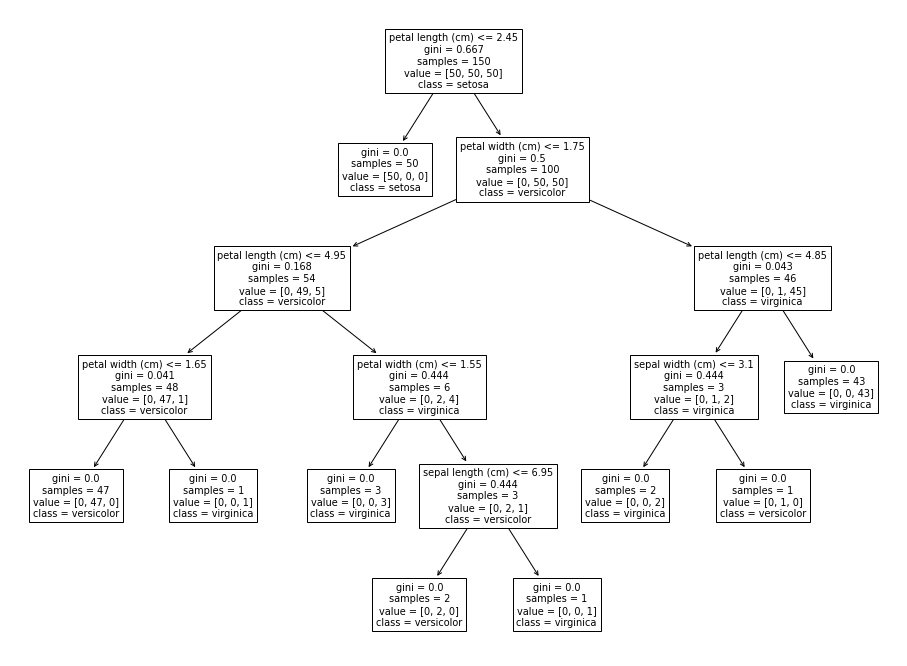

In [ ]:
plt.figure(figsize=(16,12))
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=False)
plt.show()

## Lab 4: Intrusion Detection (Simple)

Packet Intrusion Detection

In [ ]:
data = [
    [80,  80, 'Benign'],
    [8787, 8787, 'Malicious'],
    [ 80, 53, 'Benign'],
    [ 8787, 53, 'Benign'],

]

column_name = ['src_port', 'dst_port', 'label']

df = pd.DataFrame(data, columns = column_name)
df.head()

,src_port,dst_port,label
0,80,80,Benign
1,8787,8787,Malicious
2,80,53,Benign
3,8787,53,Benign


Enter your code in the following cell

## Lab 5: Intrusion Detection (Advanced)

LUFlow is an flow-based intrusion detection data set which contains a robust ground truth through correlation with threat intelligence services.

Reference:
https://www.kaggle.com/mryanm/luflow-network-intrusion-detection-data-set

LUFlow contains telemetry containing emerging attack vectors through the composition of honeypots within Lancaster University's address space.



The labelling mechanism is autonomous, enabling the constant capture, labelling and publishing of telemetry to this repository.
Flows which were unable to be determined as malicious, but are not part of the normal telemetry profile are labelled as outliers. These are included to encourage further analysis to discover the true intent behind their actions. Known normal traffic is also captured from production services, e.g. ssh and database traffic, and included in this data set.

- `src_ip`	The source IP address associated with the flow. This feature is anonymised to the corresponding Autonomous System
- `src_port`	The source port number associated with the flow.
- `dest_ip`	The destination IP address associated with the flow. The feature is also anonymised in the same manner as before.
- `dest_port`	The destination port number associated with the flow
- `protocol`	The protocol number associated with the flow. For example TCP is 6
- `bytes_in`	The number of bytes transmitted from source to destination
- `bytes_out`	The number of bytes transmitted from destination to source.
- `numpktsin`	The packet count from source to destination
- `numpktsout`	The packet count from destination to source
- `entropy`	The entropy in bits per byte of the data fields within the flow. This number ranges from 0 to 8.
- `total_entropy`	The total entropy in bytes over all of the bytes in the data fields of the flow
- `mean_ipt`	The mean of the inter-packet arrival times of the flow
- `time_start`	The start time of the flow in seconds since the epoch.
- `time_end`	The end time of the flow in seconds since the epoch
- `duration`	The flow duration time, with microsecond precision
- `label`	The label of the flow, as decided by Tangerine. Either benign, outlier, or malicious

### Load Data
A customized function to download network flow data from Github repo.



In [ ]:
# a customized function to download data /data folder

import os
from os import path
import urllib.request

# https://raw.githubusercontent.com/tisage/decisionTree/main/network_flow_2020.10.01.gz

# data downloading
filename = 'data/network_flow.gz'

if path.exists(filename):
    None
else:
    DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/tisage/decisionTree/main/'
    SAVE_PATH = os.path.join("data")
    URL = DOWNLOAD_ROOT + "network_flow_2020.10.01.gz"
    
    # a customized function to download gz files from websites
    def fetch_data(download_url = URL, save_path=SAVE_PATH):
        if not os.path.isdir(save_path):
            os.makedirs(save_path)
        tgz_path = os.path.join(save_path, "network_flow.gz")
        urllib.request.urlretrieve(download_url, tgz_path)
    
    fetch_data()
    print("Data downloaded.")    

In [ ]:
import warnings

import pandas as pd
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# load data from compressed data
raw = pd.read_csv('data/network_flow.gz', compression='gzip')
raw.head()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,0.0,0,14480,786,9200.0,2.116894,10,0,6,786,43432.0,1601521393115058,1601521393114933,30652.621,benign,0.000125
1,0.0,0,7240,786,9200.0,3.748675,5,0,6,786,43428.0,1601521393115613,1601521393115579,27140.404,benign,0.000034
2,0.0,0,14480,786,9200.0,2.079622,10,0,6,786,43436.0,1601521393116141,1601521393115993,30112.930,benign,0.000148
3,0.0,0,14480,786,9200.0,2.033979,10,0,6,786,43434.0,1601521393116629,1601521393116562,29452.021,benign,0.000067
4,0.0,0,14480,786,9200.0,1.955485,10,0,6,786,43434.0,1601521393116743,1601521393116635,28315.428,benign,0.000108


In [ ]:
raw.dtypes

avg_ipt          float64
bytes_in           int64
bytes_out          int64
dest_ip            int64
dest_port        float64
entropy          float64
num_pkts_out       int64
num_pkts_in        int64
proto              int64
src_ip             int64
src_port         float64
time_end           int64
time_start         int64
total_entropy    float64
label             object
duration         float64
dtype: object

In [ ]:
# feature selection
feature_name = ['src_ip', 'src_port', 'dest_ip', 'dest_port', 'proto',
            'num_pkts_in', 'num_pkts_out', 'entropy', 'total_entropy',
           'label']
df = raw[feature_name]

target_name = list(set(df.label))


df.head()

,src_ip,src_port,dest_ip,dest_port,proto,num_pkts_in,num_pkts_out,entropy,total_entropy,label
0,786,43432.0,786,9200.0,6,0,10,2.116894,30652.621,benign
1,786,43428.0,786,9200.0,6,0,5,3.748675,27140.404,benign
2,786,43436.0,786,9200.0,6,0,10,2.079622,30112.930,benign
3,786,43434.0,786,9200.0,6,0,10,2.033979,29452.021,benign
4,786,43434.0,786,9200.0,6,0,10,1.955485,28315.428,benign


### Processing Data

In [ ]:
# pre-processing
from sklearn.preprocessing import OrdinalEncoder

feature_enc = OrdinalEncoder()
label_enc = OrdinalEncoder()

# categorical data
feature_enc.fit(df[['proto','src_ip', 'dest_ip']])
label_enc.fit(df[['label']])

# transform
df[['proto','src_ip', 'dest_ip']] = feature_enc.transform(df[['proto','src_ip', 'dest_ip']])
df[['label']] = label_enc.transform(df[['label']])

# drop n/a data
df.dropna(inplace=True)
df.shape

(1068688, 10)

In [ ]:
df.head()

,src_ip,src_port,dest_ip,dest_port,proto,num_pkts_in,num_pkts_out,entropy,total_entropy,label
0,6.0,43432.0,4.0,9200.0,1.0,0,10,2.116894,30652.621,0.0
1,6.0,43428.0,4.0,9200.0,1.0,0,5,3.748675,27140.404,0.0
2,6.0,43436.0,4.0,9200.0,1.0,0,10,2.079622,30112.930,0.0
3,6.0,43434.0,4.0,9200.0,1.0,0,10,2.033979,29452.021,0.0
4,6.0,43434.0,4.0,9200.0,1.0,0,10,1.955485,28315.428,0.0


In [ ]:
# separate features and label
X_train = df.loc[:, df.columns != 'label']
y_train = df['label'].values

In [ ]:
# build classifier and fit data

from sklearn.tree import plot_tree
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=42, max_depth=10)
clf = clf.fit(X_train, y_train)

In [ ]:
# basic model evaluation
# should test using data split
# but only test training data for now

# scikit-learn metrics module for accuracy calculation
from sklearn import metrics 

y_pred = clf.predict(X_train)
print("Accuracy:", metrics.accuracy_score(y_train, y_pred))

Accuracy: 0.9858490036381058


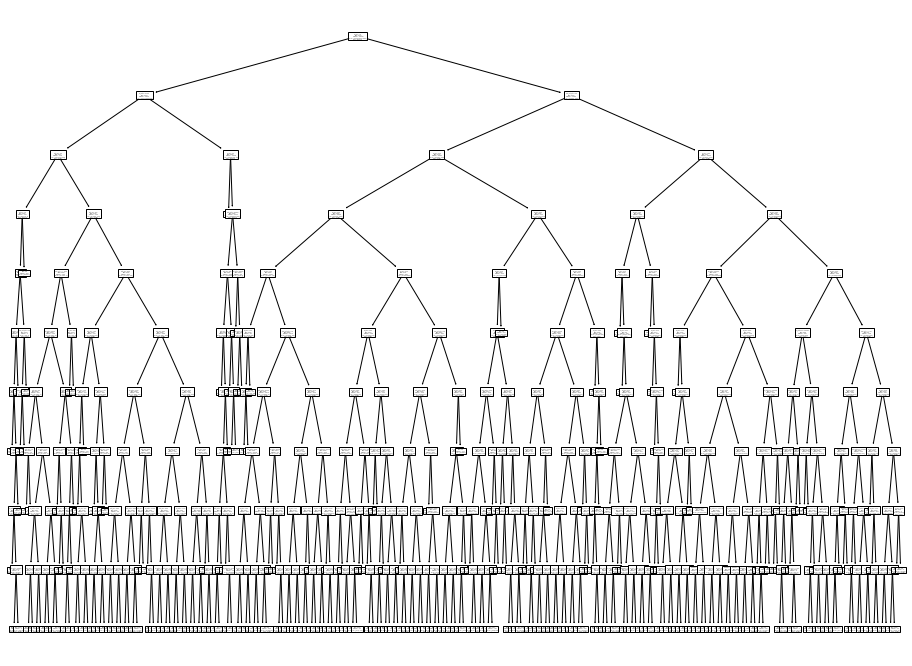

In [ ]:
# since data is larger than usual
# the tree will be very large to show in notebook
# and takes longer time to plot the tree

import matplotlib.pyplot as plt

plt.figure(figsize=(16,12))
plot_tree(clf, feature_names=feature_name, class_names=target_name, filled=False)
plt.show()